<img src='new_img/odsc.png'>

#   Keeping up with the Deep-Learning Curve via Keras
<img src='new_img/entree.png' align='middle'/>


# Recurrent Neural Nets


###  Snippet of a fully connected model
<img src='new_img/full_connect.png'/>

### Snippet of RNN
<img src='new_img/rnn3.jpg'/>

#### Our recurrence formula:
$s_t=f_W(s_{t-1},x_t)$
 
s_t=tanh(Whh(ht-1) + Wxh(xt))    

### Pseudo-code example:  RNN for text 'generation' 

In [ ]:
# just pseudo-code, no need to run this cell. .

Vocab_size =1000 
hidden_layer=100

# U ~ 100x 1000
# V ~ 1000 x 100
# W ~ 100 x 100 

time_steps = 10   #  where time_steps are # of words in sample

# define our state matrix:
# s = 10 X 100

# output
# o = 1 x 1000

# given some word input, let's predict the next word 
for t in range(time_steps):
    #  U[x[t]   ~ essentially a look-up for U
    s[t]=np.tanh(np.dot(U,x[t]) + np.dot(W,s[t-1])) 
    o[t] = softmax(V.dot(s[t]))
                 
## during backprop, we continue to update each matrix: U,V,W


### RNN: Process Sequences

<img src='new_img/rnn_one.png'/>

- we have flexibility with the number of outputs/ inputs    
oTm : image to captioning      
mTo: sentence to sentiment      
mTm: videos to captioning // translation Eng to French (variable length on input / output )    
mTm: classification decision for every frame ?     

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Reshape, Activation, Bidirectional,\
     SimpleRNN, GRU, LSTM, Convolution1D, MaxPooling1D,  Dropout, Convolution2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from IPython.display import SVG

from tensorflow.keras.datasets import imdb, reuters 
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import model_to_dot, plot_model

from tensorflow import keras
import pandas as pd

import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

UsageError: Line magic function `%` not found.


## RNN Example: Text Classification

- We'll work with reuter newswire to classification dataset.   
- 46 classes
- We will model this using RNNs, but first let's try with an ANN. 

#### Ex 1: Reuters newswire data via ANN



In [11]:
max_features=2000
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=max_features)
test=pd.DataFrame(X_train)
test.head()

# get a sence of length of a typicaly observation
test['len']=test[0].apply(lambda x: len(x))

test['max']=test[0].apply(lambda x: max(x))
test.describe()

2113536/2110848 [==============================] - 0s 0us/step


/Users/julialintern/.local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/julialintern/.local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


,len,max
count,8982.000000,8982.000000
mean,145.539857,1635.191605
std,145.822248,424.364717
min,13.000000,86.000000
25%,60.000000,1506.000000
50%,95.000000,1809.000000
75%,179.000000,1938.000000
max,2376.000000,1999.000000


In [12]:
# restrict our vocabulary to the top 2000 most frequent words
max_features = 2000
(X_train, y_train), (X_test, y_test) = reuters.load_data(
    num_words=max_features)
maxlen = 150
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
nb_epoch = 20

/Users/julialintern/.local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/julialintern/.local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [13]:
# let's see how our data is returned
print(X_test[0])
print(y_test[0])

# ~ 46 labels 
np.unique(y_test)

[   0    0    0    0    0    1    4 1378    2    9  697    2  111    8
   25  109   29    2   11  150  244  364   33   30   30 1398  333    6
    2  159    9 1084  363   13    2   71    9    2   71  117    4  225
   78  206   10    9 1214    8    4  270    5    2    7  748   48    9
    2    7  207 1451  966 1864  793   97  133  336    7    4  493   98
  273  104  284   25   39  338   22  905  220    2  644   59   20    6
  119   61   11   15   58  579   26   10   67    7    4  738   98   43
   88  333  722   12   20    6   19  746   35   15   10    9 1214  855
  129  783   21    4    2  244  364   51   16  299  452   16  515    4
   99   29    5    4  364  281   48   10    9 1214   23  644   47   20
  324   27   56    2    2    5  192  510   17   12]
3


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [18]:
y_test.shape

(2246,)

In [14]:
# let's see what these #'s translate to?! 
word_index = reuters.get_word_index(path="reuters_word_index.json")

ind_2_word={v: k for k, v in word_index.items()}

print([ind_2_word[i] for i in X_test[0] if i !=0])
print('\n')


557056/550378 [==============================] - 0s 0us/step
['the', 'in', 'wants', 'of', '3', 'how', 'of', 'could', 'mln', 'at', 'against', '2', 'of', 'vs', 'end', 'products', 'opec', 'he', 'will', 'will', 'along', 'results', 'and', 'of', 'exports', '3', 'purchased', 'each', 'it', 'of', 'profit', '3', 'of', 'profit', 'agreement', 'in', 'around', 'corp', 'should', 'for', '3', 'cannot', 'mln', 'in', 'ended', 'said', 'of', 'a', '54', 'but', '3', 'of', 'a', 'only', 'generally', 'political', 'primarily', 'date', 'other', 'under', 'well', 'a', 'in', 'british', 'rate', 'gain', 'if', 'demand', 'at', 'an', 'div', 'its', 'taking', 'report', 'of', 'systems', 'were', 'is', 'and', 'production', 'had', 'vs', '000', '7', 'issued', 'year', 'for', '0', 'a', 'in', 'buffer', 'rate', 'loss', 'may', 'results', 'tariffs', 'dlrs', 'is', 'and', 'from', '39', 's', '000', 'for', '3', 'cannot', 'pre', '50', 'east', 'that', 'in', 'of', 'products', 'opec', 'last', '1', 'fall', 'change', '1', 'approval', 'in', '15

In [21]:
X_train.shape

(8982, 150)

In [23]:
# Develop ANN Model

model = Sequential()

model.add(Dense(64, input_dim=150, kernel_initializer='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, kernel_initializer='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(46, kernel_initializer='uniform'))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

cb=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')
fit1 = model.fit(X_train, y_train,
          epochs=20, callbacks=[cb],
          batch_size=32,validation_data=(X_test, y_test))


Epoch 1/20
281/281 [==============================] - 1s 2ms/step - loss: 2.7487 - accuracy: 0.3084 - val_loss: 2.3546 - val_accuracy: 0.3762
Epoch 2/20
281/281 [==============================] - 0s 715us/step - loss: 2.3718 - accuracy: 0.3656 - val_loss: 2.3195 - val_accuracy: 0.3731
Epoch 3/20
281/281 [==============================] - 0s 725us/step - loss: 2.3665 - accuracy: 0.3687 - val_loss: 2.3275 - val_accuracy: 0.3758
Epoch 4/20
281/281 [==============================] - 0s 713us/step - loss: 2.3545 - accuracy: 0.3666 - val_loss: 2.3264 - val_accuracy: 0.3802


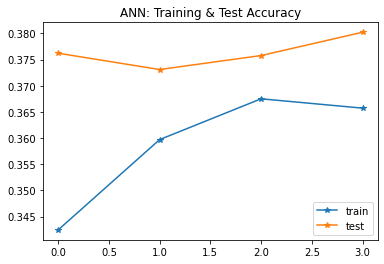

In [26]:

plt.plot(range(len(fit1.history['accuracy'])),fit1.history['accuracy'],marker='*',label='train')
plt.plot(range(len(fit1.history['accuracy'])),fit1.history['val_accuracy'],marker='*',label='test')
plt.title('ANN: Training & Test Accuracy')
plt.legend();


### Thoughts ? 

#### Ex 2: Reuters newswire data via RNN

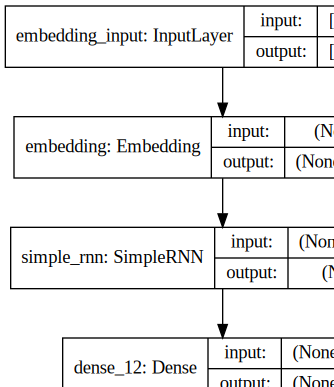

In [27]:
# Create the model
model = Sequential()

# what is this Embedding Layer ? 
model.add(Embedding(input_dim=max_features, output_dim=100, embeddings_initializer="glorot_uniform", input_length=maxlen))
# This is the most basic kind of RNN!  We're using 20 units, 
# which somewhat reflects our "memory" of past events in a sequence
model.add(SimpleRNN(20, return_sequences=False))
model.add(Dense(46))  # number of classes
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [28]:
cb=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

fit2=model.fit(X_train,y_train,epochs=20,
         validation_data=(X_test,y_test),callbacks=[cb])

Epoch 1/20
281/281 [==============================] - 5s 15ms/step - loss: 2.7970 - accuracy: 0.3405 - val_loss: 2.1337 - val_accuracy: 0.4835
Epoch 2/20
281/281 [==============================] - 4s 15ms/step - loss: 2.0390 - accuracy: 0.4913 - val_loss: 2.0163 - val_accuracy: 0.5116
Epoch 3/20
281/281 [==============================] - 4s 15ms/step - loss: 1.8591 - accuracy: 0.5316 - val_loss: 1.9955 - val_accuracy: 0.5240
Epoch 4/20
281/281 [==============================] - 5s 16ms/step - loss: 1.6995 - accuracy: 0.5719 - val_loss: 1.9700 - val_accuracy: 0.5378
Epoch 5/20
281/281 [==============================] - 4s 15ms/step - loss: 1.5869 - accuracy: 0.6077 - val_loss: 2.0183 - val_accuracy: 0.5414
Epoch 6/20
281/281 [==============================] - 4s 15ms/step - loss: 1.4645 - accuracy: 0.6453 - val_loss: 2.0852 - val_accuracy: 0.5111


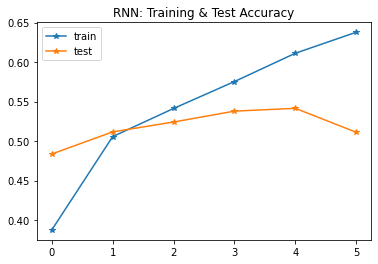

In [30]:
plt.plot(range(len(fit2.history['accuracy'])),fit2.history['accuracy'],marker='*',label='train')
plt.plot(range(len(fit2.history['accuracy'])),fit2.history['val_accuracy'],marker='*',label='test')
plt.title('RNN: Training & Test Accuracy')
plt.legend();


## Thoughts here ?
- Let's improve ! 

### LSTM  - Long Short Term Memory

<img src='new_img/lstm_3_anno.png'/>
<img src='new_img/lstm_eqn.png'/>

[credits: Colah's Blog](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

#### Ex 3: Reuters newswire via LSTM



1) Run the following LSTM model.     
- We see a moderate improvement from our RNN model.  How can we improve this further? 

Hints: 
* Adjust # of memory units
* Compare & contrast different optimizers
* Shit-tab to read LSTM & Embedding DocStrings.  Experiment with other arguments.

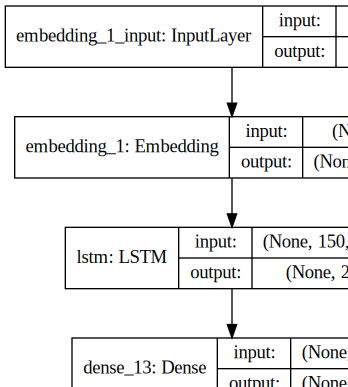

In [31]:
# 1st run through, LSTM 
model = Sequential()

model.add(Embedding(input_dim=max_features, output_dim=100, embeddings_initializer="glorot_uniform", input_length=maxlen))
model.add(LSTM(20, return_sequences=False)) # again 20 'memory' units
model.add(Dense(46))  # number of classes
model.add(Activation('softmax'))

np.random.seed(123)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [32]:
# hmmm .. let's introduce reduceonplateau
cb1=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
cb2=keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=0, mode='auto', cooldown=0, min_lr=0)


fit3=model.fit(X_train,y_train,epochs=20,
         validation_data=(X_test,y_test),callbacks=[cb1,cb2])

Epoch 1/20
281/281 [==============================] - 9s 30ms/step - loss: 2.7013 - accuracy: 0.4018 - val_loss: 1.7905 - val_accuracy: 0.5548
Epoch 2/20
281/281 [==============================] - 8s 29ms/step - loss: 1.7644 - accuracy: 0.5502 - val_loss: 1.7087 - val_accuracy: 0.5592
Epoch 3/20
281/281 [==============================] - 8s 30ms/step - loss: 1.6305 - accuracy: 0.5819 - val_loss: 1.6985 - val_accuracy: 0.5846
Epoch 4/20
281/281 [==============================] - 8s 30ms/step - loss: 1.5319 - accuracy: 0.6176 - val_loss: 1.5301 - val_accuracy: 0.6149
Epoch 5/20
281/281 [==============================] - 8s 30ms/step - loss: 1.4121 - accuracy: 0.6440 - val_loss: 1.5063 - val_accuracy: 0.6238
Epoch 6/20
281/281 [==============================] - 8s 30ms/step - loss: 1.2954 - accuracy: 0.6807 - val_loss: 1.4465 - val_accuracy: 0.6389
Epoch 7/20
281/281 [==============================] - 8s 30ms/step - loss: 1.2226 - accuracy: 0.6925 - val_loss: 1.4203 - val_accuracy: 0.6532

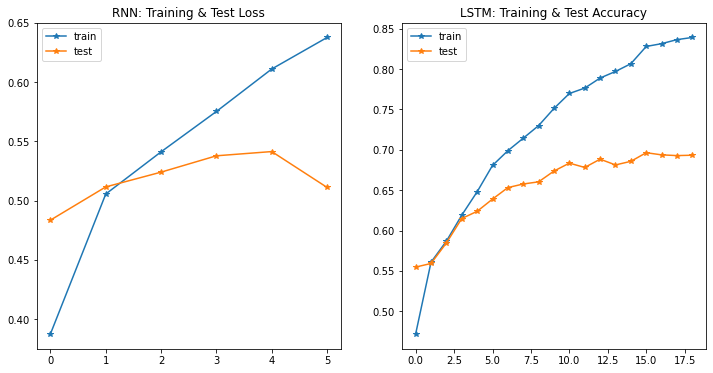

In [33]:
### LSTM vs RNN

# visualize training process 
fig,ax=plt.subplots(1,2,figsize=(12,6))

ax[0].plot(range(len(fit2.history['accuracy'])),fit2.history['accuracy'],marker='*',label='train')
ax[0].plot(range(len(fit2.history['accuracy'])),fit2.history['val_accuracy'],marker='*',label='test')
ax[0].set_title('RNN: Training & Test Loss')
ax[0].legend();


ax[1].plot(range(len(fit3.history['accuracy'])),fit3.history['accuracy'],marker='*',label='train')
ax[1].plot(range(len(fit3.history['accuracy'])),fit3.history['val_accuracy'],marker='*',label='test')
ax[1].set_title('LSTM: Training & Test Accuracy')
ax[1].legend();

In [36]:
# add pretrained Embedding 

embeddings_index = {}
f = open('/Users/julialintern/Downloads/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [37]:
EMBEDDING_DIM=100

embedding_matrix = np.zeros(shape=(max_features, EMBEDDING_DIM))
for word, i in enumerate(word_index):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [38]:
# for example: 
embeddings_index.get('president')

array([-0.064549, -0.13812 ,  0.50017 ,  0.41434 ,  0.45832 , -0.048331,
       -0.21651 ,  0.34987 , -0.83235 , -0.62282 , -0.40099 , -0.31978 ,
        0.42928 , -0.026035, -0.16171 , -0.32513 ,  0.77604 , -0.39852 ,
       -0.67013 , -0.55876 , -0.39863 , -0.28143 ,  0.68614 ,  0.29229 ,
       -0.7146  ,  0.36995 , -0.45309 , -0.23193 ,  0.76916 , -0.031589,
        1.0603  ,  1.5446  , -0.13272 ,  0.33701 , -0.97561 ,  0.73617 ,
        0.60841 ,  0.558   , -0.39274 ,  0.1121  , -1.0474  , -0.03692 ,
        0.99908 , -0.044925, -0.41186 ,  0.19605 ,  0.093281, -0.59623 ,
       -0.60765 , -0.4742  , -0.30162 , -0.70128 , -0.20055 ,  0.99519 ,
        0.20088 , -2.5636  , -0.14627 ,  0.77824 ,  1.4913  ,  0.29724 ,
       -0.12084 , -0.060082,  0.079881, -0.38348 ,  0.41371 , -0.41284 ,
        0.61702 ,  1.1316  , -0.047434,  0.2848  ,  0.57694 , -0.45501 ,
       -0.76359 , -1.1659  ,  0.068946, -0.22498 ,  0.18691 ,  0.64142 ,
       -1.7505  , -0.091248,  0.85848 , -0.52203 , 

In [ ]:
# nice !! 

In [39]:
# 2nd run through, LSTM: let's refine a bit further ?! 
model = Sequential()

# 1) add pretrained embeddings
model.add(Embedding(input_dim=max_features, output_dim=100,  weights=[embedding_matrix], embeddings_initializer="glorot_uniform", input_length=maxlen))

# 2) crank up LSTM memory
model.add(LSTM(100, return_sequences=False)) 
model.add(Dense(46))  # number of classes
model.add(Activation('softmax'))

np.random.seed(123)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',  # changed optimizer to adam; can help with faster convergence
              metrics=['accuracy'])

In [40]:
cb1=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
cb2=keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=0, mode='auto', cooldown=0, min_lr=0)

fit4=model.fit(X_train,y_train,epochs=20,
         validation_data=(X_test,y_test),callbacks=[cb])

Epoch 1/20
281/281 [==============================] - 25s 83ms/step - loss: 2.5518 - accuracy: 0.3745 - val_loss: 1.9882 - val_accuracy: 0.4911
Epoch 2/20
281/281 [==============================] - 23s 81ms/step - loss: 1.8302 - accuracy: 0.5231 - val_loss: 1.7198 - val_accuracy: 0.5628
Epoch 3/20
281/281 [==============================] - 23s 83ms/step - loss: 1.7400 - accuracy: 0.5471 - val_loss: 1.6976 - val_accuracy: 0.5619
Epoch 4/20
281/281 [==============================] - 24s 84ms/step - loss: 1.5916 - accuracy: 0.5854 - val_loss: 1.5858 - val_accuracy: 0.5966
Epoch 5/20
281/281 [==============================] - 23s 81ms/step - loss: 1.4902 - accuracy: 0.6068 - val_loss: 1.5207 - val_accuracy: 0.6104
Epoch 6/20
281/281 [==============================] - 23s 83ms/step - loss: 1.3732 - accuracy: 0.6441 - val_loss: 1.6142 - val_accuracy: 0.5917
Epoch 7/20
281/281 [==============================] - 23s 81ms/step - loss: 1.3022 - accuracy: 0.6643 - val_loss: 1.3646 - val_accuracy:

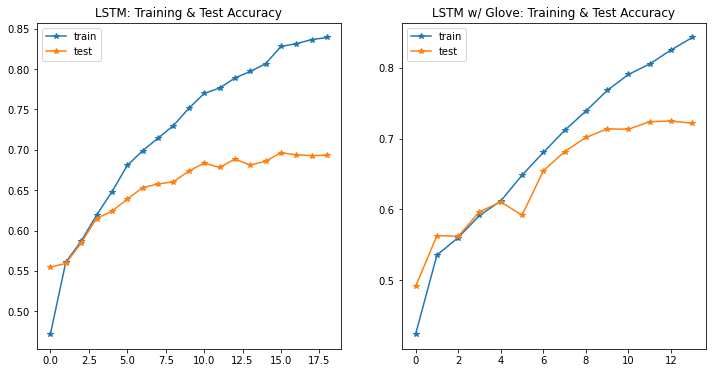

In [42]:
# LSTM 1 vs LSTM2
fig,ax=plt.subplots(1,2,figsize=(12,6))

ax[0].plot(range(len(fit3.history['accuracy'])),fit3.history['accuracy'],marker='*',label='train')
ax[0].plot(range(len(fit3.history['accuracy'])),fit3.history['val_accuracy'],marker='*',label='test')
ax[0].set_title('LSTM: Training & Test Accuracy')
ax[0].legend();


ax[1].plot(range(len(fit4.history['accuracy'])),fit4.history['accuracy'],marker='*',label='train')
ax[1].plot(range(len(fit4.history['accuracy'])),fit4.history['val_accuracy'],marker='*',label='test')
ax[1].set_title('LSTM w/ Glove: Training & Test Accuracy')
ax[1].legend();

###   Code-Along: 
Try to reduce overfitting by adding Dropout to the the architecture 

In [77]:
# enter your code here ! 

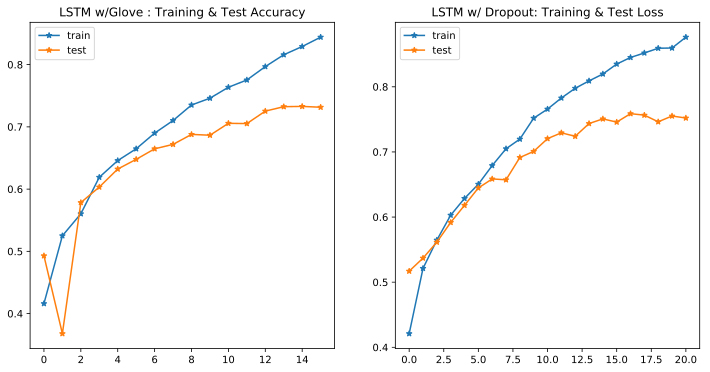

In [79]:
# LSTM2 vs LSTM3
fig,ax=plt.subplots(1,2,figsize=(12,6))

ax[0].plot(range(len(fit4.history['accuracy'])),fit4.history['accuracy'],marker='*',label='train')
ax[0].plot(range(len(fit4.history['accuracy'])),fit4.history['val_accuracy'],marker='*',label='test')
ax[0].set_title('LSTM w/Glove : Training & Test Accuracy')
ax[0].legend();


ax[1].plot(range(len(fit5.history['accuracy'])),fit5.history['accuracy'],marker='*',label='train')
ax[1].plot(range(len(fit5.history['accuracy'])),fit5.history['val_accuracy'],marker='*',label='test')
ax[1].set_title('LSTM w/ Dropout: Training & Test Loss')
ax[1].legend();

In [ ]:
# note about train vs test, we want to try to cross the threshold --> then peel back,